<a href="https://colab.research.google.com/github/koleshjr/collab_projects/blob/main/alvinseda_updatedEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALVIN'S EDA

### Import all the necessary Libraries

In [ ]:
#Import some libraries
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import plotly.express as px
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
# from imblearn.over_sampling import SMOTE

pd.options.display.max_rows = 2200

In [ ]:
path = "./"

### Load the datasets and find statistical information about them

In [ ]:
#import data
train = pd.read_csv(path+'/Train.csv')
test=  pd.read_csv(path+'/Test.csv')
submission = pd.read_csv(path+'/SampleSubmission.csv')
vardef = pd.read_csv(path+"/VariableDefinitions.csv")
extra = pd.read_csv(path+"extra_data.csv")

In [ ]:
train.shape,test.shape,extra.shape

((373, 12), (558, 11), (10000, 12))

In [ ]:
train.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MERCHANT_CATEGORIZED_AT                373 non-null    object 
 1   MERCHANT_NAME                          373 non-null    object 
 2   MERCHANT_CATEGORIZED_AS                373 non-null    object 
 3   PURCHASE_VALUE                         373 non-null    int64  
 4   PURCHASED_AT                           373 non-null    object 
 5   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  373 non-null    bool   
 6   USER_AGE                               61 non-null     float64
 7   USER_GENDER                            367 non-null    object 
 8   USER_HOUSEHOLD                         373 non-null    int64  
 9   USER_INCOME                            373 non-null    int64  
 10  USER_ID                                373 non-null    object 
 11  Transa

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PURCHASE_VALUE,373.0,4506.522788,15722.261797,10.0,150.0,690.0,2000.0,150000.0
USER_AGE,61.0,25.803279,1.423841,25.0,25.0,25.0,27.0,32.0
USER_HOUSEHOLD,373.0,2.831099,1.600033,1.0,1.0,3.0,4.0,7.0
USER_INCOME,373.0,146235.924933,166521.780346,8000.0,23000.0,90000.0,200000.0,1000000.0


### Missing values for train, test and extra

In [ ]:
#check for missing values
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_train = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})
missing_value_train

,column_name,percent_missing
MERCHANT_CATEGORIZED_AT,MERCHANT_CATEGORIZED_AT,0.000000
MERCHANT_NAME,MERCHANT_NAME,0.000000
MERCHANT_CATEGORIZED_AS,MERCHANT_CATEGORIZED_AS,0.000000
PURCHASE_VALUE,PURCHASE_VALUE,0.000000
PURCHASED_AT,PURCHASED_AT,0.000000
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,0.000000
USER_AGE,USER_AGE,83.646113
USER_GENDER,USER_GENDER,1.608579
USER_HOUSEHOLD,USER_HOUSEHOLD,0.000000
USER_INCOME,USER_INCOME,0.000000


In [ ]:
#check for missing values
percent_missing = test.isnull().sum() * 100 / len(test)
missing_value_test = pd.DataFrame({'column_name': test.columns,
                                 'percent_missing': percent_missing})
missing_value_test

,column_name,percent_missing
MERCHANT_CATEGORIZED_AT,MERCHANT_CATEGORIZED_AT,0.000000
MERCHANT_NAME,MERCHANT_NAME,0.000000
PURCHASE_VALUE,PURCHASE_VALUE,0.000000
PURCHASED_AT,PURCHASED_AT,0.000000
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,0.000000
USER_AGE,USER_AGE,84.767025
USER_GENDER,USER_GENDER,0.896057
USER_HOUSEHOLD,USER_HOUSEHOLD,0.000000
USER_INCOME,USER_INCOME,0.000000
USER_ID,USER_ID,0.000000


In [ ]:
#check for missing values
percent_missing = extra.isnull().sum() * 100 / len(extra)
missing_value_extra = pd.DataFrame({'column_name': extra.columns,
                                 'percent_missing': percent_missing})
missing_value_extra

,column_name,percent_missing
MERCHANT_CATEGORIZED_AT,MERCHANT_CATEGORIZED_AT,100.00
MERCHANT_NAME,MERCHANT_NAME,0.00
MERCHANT_CATEGORIZED_AS,MERCHANT_CATEGORIZED_AS,100.00
PURCHASE_VALUE,PURCHASE_VALUE,0.00
PURCHASED_AT,PURCHASED_AT,0.00
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,0.00
USER_AGE,USER_AGE,88.42
USER_GENDER,USER_GENDER,0.34
USER_HOUSEHOLD,USER_HOUSEHOLD,0.00
USER_INCOME,USER_INCOME,0.00


In [ ]:
extra = extra.drop(columns = ['MERCHANT_CATEGORIZED_AS','MERCHANT_CATEGORIZED_AT'])

In [ ]:
cat_columns = [col for col in train.select_dtypes('object').columns]

num_columns = [col for col in train.select_dtypes(['int', 'float']).columns]

### Lets fill the categorical ones with male 
* I chose this because the missing gender is only for one person. So he/she may either be a male or female so used male

In [ ]:
train['USER_GENDER'].value_counts()

Male      197
Female    170
Name: USER_GENDER, dtype: int64

In [ ]:
for col in train.columns:

  if col in ['USER_GENDER']:
    train[col] = train[col].fillna('Male')
    

# Confirm that there aren't any missing values
train[train.columns.difference(['cost_category'])].isna().sum()

IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
MERCHANT_CATEGORIZED_AS                    0
MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
PURCHASED_AT                               0
PURCHASE_VALUE                             0
Transaction_ID                             0
USER_AGE                                 312
USER_GENDER                                0
USER_HOUSEHOLD                             0
USER_ID                                    0
USER_INCOME                                0
dtype: int64

In [ ]:
for col in test.columns:

  if col in ['USER_GENDER']:
    test[col] = test[col].fillna('Male')
    

# Confirm that there aren't any missing values
test[test.columns.difference(['cost_category'])].isna().sum()

IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
PURCHASED_AT                               0
PURCHASE_VALUE                             0
Transaction_ID                             0
USER_AGE                                 473
USER_GENDER                                0
USER_HOUSEHOLD                             0
USER_ID                                    0
USER_INCOME                                0
dtype: int64

In [ ]:
for col in extra.columns:

  if col in ['USER_GENDER']:
    extra[col] = extra[col].fillna('Male')
    

# Confirm that there aren't any missing values
extra[extra.columns.difference(['cost_category'])].isna().sum()

IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY       0
MERCHANT_NAME                               0
PURCHASED_AT                                0
PURCHASE_VALUE                              0
Transaction_ID                              0
USER_AGE                                 8842
USER_GENDER                                 0
USER_HOUSEHOLD                              0
USER_ID                                     0
USER_INCOME                                 0
dtype: int64

### For a baseline lets drop the age column (84% is alot of missing values)

In [ ]:
train = train.drop(columns = 'USER_AGE')
test = test.drop(columns = 'USER_AGE')
extra = extra.drop(columns = 'USER_AGE')
train.shape,test.shape,extra.shape

((373, 11), (558, 10), (10000, 9))

## Categorical Data

In [ ]:
# check unique values in dataset
train.apply(lambda x: len(x.unique()))

MERCHANT_CATEGORIZED_AT                   58
MERCHANT_NAME                            218
MERCHANT_CATEGORIZED_AS                   13
PURCHASE_VALUE                           150
PURCHASED_AT                             365
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      2
USER_GENDER                                2
USER_HOUSEHOLD                             7
USER_INCOME                               15
USER_ID                                   25
Transaction_ID                           373
dtype: int64

In [ ]:
# check unique values in dataset
test.apply(lambda x: len(x.unique()))

MERCHANT_CATEGORIZED_AT                   57
MERCHANT_NAME                            314
PURCHASE_VALUE                           213
PURCHASED_AT                             535
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      2
USER_GENDER                                2
USER_HOUSEHOLD                             9
USER_INCOME                               17
USER_ID                                   30
Transaction_ID                           558
dtype: int64

### Levels In the Categorical Data + Date with a lot of classes
### Categorized at 


In [ ]:
train['MERCHANT_CATEGORIZED_AT'].value_counts()

2022-04-12 15:59:14.139347+00    42
2022-03-16 13:08:19.703288+00    35
2022-03-16 13:05:51.851102+00    35
2022-04-12 15:57:05.758311+00    30
2022-05-31 13:27:24.704992+00    20
2021-09-01 02:20:12.680427+00    18
2021-09-01 02:19:31.317098+00    15
2021-10-05 12:29:13.14963+00     13
2022-06-01 10:23:56.42678+00     13
2021-10-25 16:27:55.188211+00    12
2022-06-01 10:25:16.7131+00      11
2022-03-10 18:25:42.112294+00     8
2022-05-31 13:27:55.17584+00      8
2022-05-12 15:46:32.634262+00     7
2021-10-05 12:45:58.000193+00     6
2021-12-01 08:30:46.660752+00     6
2022-03-10 18:21:31.781487+00     6
2022-05-31 13:21:55.629867+00     6
2021-10-25 16:18:38.586837+00     5
2022-04-12 15:57:15.179609+00     5
2022-04-12 15:59:29.101096+00     5
2021-11-30 10:51:36.702996+00     4
2021-12-01 08:33:13.82067+00      4
2022-05-12 15:40:05.951342+00     3
2022-02-23 13:37:55.038678+00     3
2021-08-06 11:28:03.723042+00     3
2021-08-06 11:28:03.855344+00     3
2022-05-13 06:55:53.403538+0

In [ ]:
test['MERCHANT_CATEGORIZED_AT'].value_counts()

2022-04-12 15:57:05.758311+00    67
2022-04-12 15:59:14.139347+00    58
2022-03-16 13:05:51.851102+00    49
2022-03-16 13:08:19.703288+00    48
2022-05-31 13:27:24.704992+00    29
2021-09-01 02:20:12.680427+00    23
2021-09-01 02:19:31.317098+00    20
2022-06-01 10:23:56.42678+00     18
2021-10-05 12:29:13.14963+00     17
2021-10-05 12:45:58.000193+00    17
2022-06-01 10:25:16.7131+00      16
2022-05-12 15:40:05.951342+00    13
2022-04-12 15:59:29.101096+00    13
2021-10-25 16:27:55.188211+00    11
2022-03-10 18:21:31.781487+00    11
2021-10-25 16:18:38.586837+00    10
2022-05-31 13:21:55.629867+00     9
2021-12-01 08:30:46.660752+00     9
2022-05-12 15:46:32.634262+00     7
2022-03-10 18:25:42.112294+00     7
2022-05-04 18:39:01.19219+00      7
2022-04-08 10:56:46.107675+00     7
2022-02-23 13:31:09.552091+00     7
2022-04-12 15:57:15.179609+00     6
2022-02-23 13:37:55.038678+00     6
2022-05-31 13:27:55.17584+00      6
2021-12-01 08:33:13.82067+00      6
2022-05-04 18:39:01.881199+0

#### get the year, month, date, day feature from this feature, see if it helps

### User_Income

In [ ]:
train['USER_INCOME'].value_counts()

10000      70
85000      63
252000     49
200000     49
90000      38
250000     19
150000     17
23000      17
8000       14
750000     13
30000       7
60000       6
100000      4
350000      4
1000000     3
Name: USER_INCOME, dtype: int64

In [ ]:
test['USER_INCOME'].value_counts()

10000      118
85000      101
252000      73
200000      63
90000       52
23000       34
150000      25
750000      22
250000      20
8000        16
30000       10
350000       9
100000       9
60000        3
1000000      1
80000        1
36000        1
Name: USER_INCOME, dtype: int64

#### Since there are two more new user_income levels in test and more in extra data decided to cluster them
* clustering was based on near price ranges as seen below

In [ ]:
def income_clusters(x):
    one=[10000]
    two=[85000, 80000]
    three=[252000]
    four =[200000]
    five=[90000]
    six =[250000]
    seven=[150000]
    eight=[23000,21500 ,20000]
    nine=[8000,5000]
    ten=[750000]
    eleven=[30000,36000,35000]
    twelve =[60000]
    thirteen=[100000]
    fourteen = [350000]
    fifteen = [1000000]
    
    if x in one:
        return 10000
    elif x in two:
        return 85000
    elif x in three:
        return 252000
    elif x in four:
        return 200000   
    elif x in five:
        return 90000
    if x in six:
        return 250000
    elif x in seven:
        return 150000
    elif x in eight:
        return 23000
    elif x in nine:
        return 8000 
    elif x in ten:
        return 750000
    if x in eleven:
        return 30000
    elif x in twelve:
        return 60000
    elif x in thirteen:
        return 100000
    elif x in fourteen:
        return 350000 
    elif x in fifteen:
        return 1000000 
test['USER_INCOME'] = test['USER_INCOME'].apply(income_clusters)
train['USER_INCOME'] = train['USER_INCOME'].apply(income_clusters)
extra['USER_INCOME'] = extra['USER_INCOME'].apply(income_clusters)
print(train['USER_INCOME'].nunique())
print(test['USER_INCOME'].nunique())
print(extra['USER_INCOME'].nunique())    

15
15
15


### User_ID

In [ ]:
train['USER_ID'].value_counts()

ID_1I8XYBWK    56
ID_3JA0MAFB    49
ID_ECX9BS4A    44
ID_ZX4DCF4K    43
ID_U9WZMGJZ    38
ID_Y0386AT9    17
ID_L8QMYB09    14
ID_O8P8YS18    14
ID_OZANC6XT    13
ID_D8FOVVBB    13
ID_40L9OTIM     9
ID_GR569FUO     7
ID_J8O7LHZ2     7
ID_WO19RXAS     7
ID_R4T8Q46J     6
ID_KARF7R4R     6
ID_OYT3IDV6     5
ID_5Y35KI6Q     5
ID_GAQ3PX9G     4
ID_3XJU0KQ9     4
ID_UJ0YSYEV     4
ID_180RJKP4     3
ID_CVK8ERW1     2
ID_BMPPYJ2U     2
ID_A7LQCJFS     1
Name: USER_ID, dtype: int64

In [ ]:
test['USER_ID'].value_counts()

ID_1I8XYBWK    92
ID_3JA0MAFB    73
ID_ZX4DCF4K    65
ID_ECX9BS4A    54
ID_U9WZMGJZ    52
ID_Y0386AT9    34
ID_D8FOVVBB    22
ID_GR569FUO    20
ID_OYT3IDV6    19
ID_O8P8YS18    17
ID_L8QMYB09    16
ID_OZANC6XT    12
ID_40L9OTIM     9
ID_3XJU0KQ9     9
ID_WO19RXAS     9
ID_J8O7LHZ2     9
ID_5Y35KI6Q     8
ID_KARF7R4R     8
ID_CVK8ERW1     6
ID_GAQ3PX9G     6
ID_R4T8Q46J     5
ID_1AMEATOU     3
ID_UJ0YSYEV     2
ID_A7LQCJFS     2
ID_180RJKP4     1
ID_QIBWKFP0     1
ID_BMPPYJ2U     1
ID_9OCPCLOX     1
ID_KVE1YQI4     1
ID_90M21S6P     1
Name: USER_ID, dtype: int64

#### 5 new customers, meaning that we have to consider this in the stratification scheme 
* well i never succeeded in this decided to go with StratifiedKFold instead

### User_ Household

In [ ]:
train['USER_HOUSEHOLD'].value_counts()

1    126
3    100
5     76
4     38
2     26
7      4
6      3
Name: USER_HOUSEHOLD, dtype: int64

In [ ]:
test['USER_HOUSEHOLD'].value_counts()

1    183
3    140
5    113
2     55
4     53
7      9
9      3
6      1
8      1
Name: USER_HOUSEHOLD, dtype: int64

#### More  user_household data in test and extra so cluster them in train

In [ ]:
def house_clusters(x):
    one=[1]
    two=[2]
    three=[3]
    four =[4]
    five=[5]
    six =[6]
    seven=[7,8,9]

    

    if x == 1:
        return 1
    if x == 2:
        return 2
    if x == 3:
        return 3
    if x == 4:
        return 4
    if x == 5:
        return 5
    if x == 6:
        return 6
    if x >= 7:
        return 7

   
test['USER_HOUSEHOLD'] = test['USER_HOUSEHOLD'].apply(house_clusters)
extra['USER_HOUSEHOLD'] = extra['USER_HOUSEHOLD'].apply(house_clusters)
print(train['USER_HOUSEHOLD'].nunique())
print(test['USER_HOUSEHOLD'].nunique())
print(extra['USER_HOUSEHOLD'].nunique())
    

7
7
7


### Merchant_Name

In [ ]:
train['MERCHANT_NAME'].value_counts()

SAFARICOM OFFERS  TUNUKIWA                          14
M-SHWARI ACCOUNT                                    12
PETER KENDA                                         10
SAFARICOM LIMITED                                   10
EQUITY PAYBILL ACCOUNT                               8
KPLC PREPAID                                         8
CARREFOUR SRT                                        7
LEAH NGOGA                                           7
SAFARICOM HOME                                       6
FATUMA OSORE                                         6
SAFARICOM POST PAID                                  5
ELIZABETH NYAMBURA                                   5
JACKSON ANDIVA                                       4
RAPHAEL MWANGI                                       4
NHIF                                                 4
KAPS PARKING                                         4
JERUSA OTIENO                                        4
CEDRIC OCHOLA                                        4
TELKOM KEN

In [ ]:
test['MERCHANT_NAME'].value_counts()

FATUMA OSORE                                         17
PETER KENDA                                          14
SAFARICOM OFFERS  TUNUKIWA                           13
KPLC PREPAID                                         12
KAPS PARKING                                         11
EQUITY PAYBILL ACCOUNT                               11
M-SHWARI ACCOUNT                                     10
SAFARICOM HOME                                        8
SAFARICOM LIMITED                                     8
LEAH NGOGA                                            8
JACKSON ANDIVA                                        7
QUICK MART KIAMBU                                     7
RAPHAEL MWANGI                                        7
TELKOM KENYA LIMITED                                  5
TEOFILO LIGAWA                                        5
KCB PAYBILL AC                                        5
SAFARICOM POST PAID                                   5
CEDRIC OCHOLA                                   

#### Even though merchant name, using domain knowledge might be useful because there is no way safaricom sells groceries but there are so many unknown vendors that may add noise to this plus there are new merchants in the test so maybe after the baseline we can work this out .
* This is our golf feature, if we can work a way around this feature in a good way then we can really bag the first prize


### Binary Columns 

In [ ]:
train['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].value_counts()

False    203
True     170
Name: IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY, dtype: int64

In [ ]:
test['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'].value_counts()

False    299
True     259
Name: IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY, dtype: int64

In [ ]:
train['USER_GENDER'].value_counts()

Male      203
Female    170
Name: USER_GENDER, dtype: int64

In [ ]:
test['USER_GENDER'].value_counts()

Male      312
Female    246
Name: USER_GENDER, dtype: int64

#### So the binary columns are almost equally balanced so fine

## NUMERICAL COLUMNS

### Purchase Value before and after log transformation

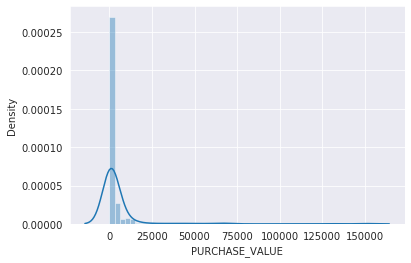

In [ ]:
sb.distplot(train['PURCHASE_VALUE'])

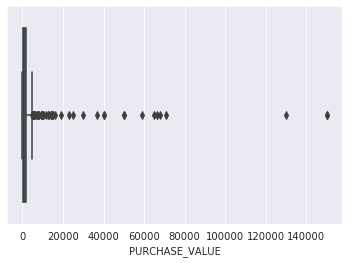

In [ ]:
sb.boxplot(train['PURCHASE_VALUE'])

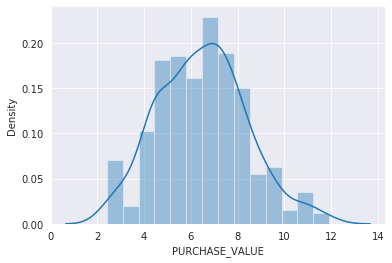

In [ ]:
sb.distplot(np.log1p(train['PURCHASE_VALUE']))

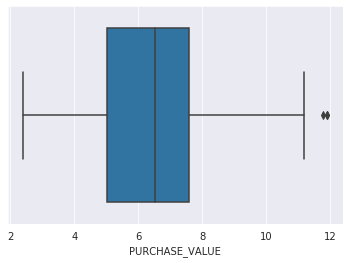

In [ ]:
sb.boxplot(np.log1p(train['PURCHASE_VALUE']))

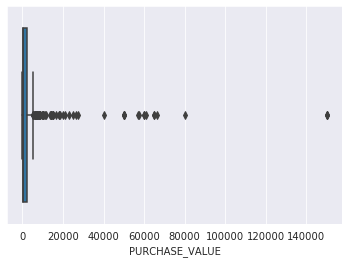

In [ ]:
sb.boxplot(test['PURCHASE_VALUE'])

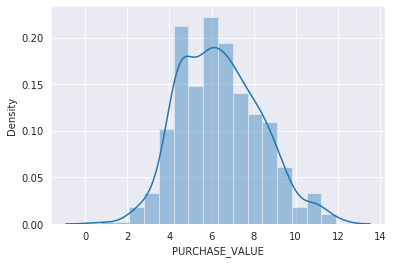

In [ ]:
sb.distplot(np.log1p(test['PURCHASE_VALUE']))

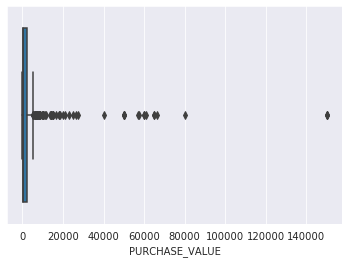

In [ ]:
sb.boxplot(test['PURCHASE_VALUE'])

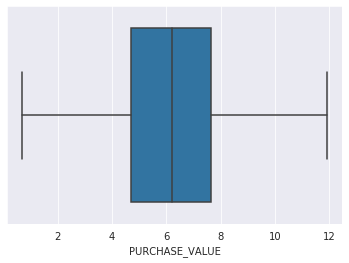

In [ ]:
sb.boxplot(np.log1p(test['PURCHASE_VALUE']))

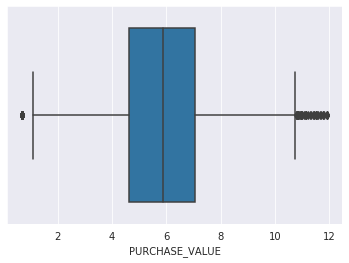

In [ ]:
sb.boxplot(np.log1p(extra['PURCHASE_VALUE']))

#### Notice how when we log transform purchase value everything behaves as a gaussian transformation so this transformation is a must have
* Turns out it made the CV score worse why? maybe we need to have those extremes for the categories that are expensive in regards to PURCHASE VALUE

In [ ]:
# train['PURCHASE_VALUE'] = np.log1p(train['PURCHASE_VALUE'])
# test['PURCHASE_VALUE'] = np.log1p(test['PURCHASE_VALUE'])
# extra['PURCHASE_VALUE'] = np.log1p(extra['PURCHASE_VALUE'])

### DATE COLUMNS
### Purchased_At 

In [ ]:
train.columns

Index(['MERCHANT_CATEGORIZED_AT', 'MERCHANT_NAME', 'MERCHANT_CATEGORIZED_AS',
       'PURCHASE_VALUE', 'PURCHASED_AT',
       'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_GENDER',
       'USER_HOUSEHOLD', 'USER_INCOME', 'USER_ID', 'Transaction_ID'],
      dtype='object')

2021-11-18 11:02:00+00    2
2021-08-24 14:53:00+00    2
2021-08-04 15:03:00+00    2
2021-01-15 15:40:00+00    2
2021-10-22 15:49:00+00    2
2021-10-11 17:12:00+00    2
2019-06-20 08:41:00+00    2
2019-03-11 05:38:00+00    2
2022-04-07 12:10:00+00    1
2022-01-21 11:29:00+00    1
2022-02-26 15:38:00+00    1
2022-05-14 19:00:00+00    1
2022-04-09 07:11:00+00    1
2021-12-02 18:37:00+00    1
2018-12-05 09:36:00+00    1
2022-03-07 20:16:00+00    1
2021-12-22 12:13:00+00    1
2021-11-19 11:24:00+00    1
2022-02-09 04:58:00+00    1
2021-11-30 08:24:00+00    1
2021-09-11 12:26:00+00    1
2022-05-25 10:00:00+00    1
2019-03-25 09:46:00+00    1
2022-05-12 05:50:00+00    1
2021-10-02 14:16:00+00    1
2020-03-24 10:10:00+00    1
2022-04-05 09:19:00+00    1
2021-11-08 10:31:00+00    1
2021-09-23 14:40:00+00    1
2021-09-27 11:18:00+00    1
2021-10-18 06:42:00+00    1
2021-11-01 08:56:00+00    1
2022-03-27 16:30:00+00    1
2021-10-23 17:46:00+00    1
2022-06-01 08:40:00+00    1
2022-06-02 19:18:00+

Text(0.5, 0, 'PURCHASED_AT')

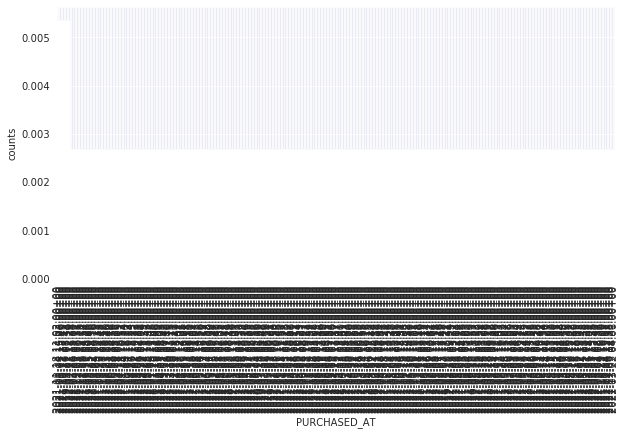

In [ ]:
print(train['PURCHASED_AT'].value_counts())
plt.figure(figsize=(10,5))
train['PURCHASED_AT'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('PURCHASED_AT')

#### On this, only few dates have more than one feature

* is it really important? feed it into the model and let the model do the rest
* More Features can be obtained from this e.g diff and cyclic features 
* No good feature came out of this really except one which was the diff of both which we will see later


### Meerchannt Categorized at we have looked at it above

### Single Level Columns(One in extra drop it)

In [ ]:
extra = extra.drop(columns = ['IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY'])
train.shape,test.shape,extra.shape

((373, 11), (558, 10), (10000, 8))

## Target Column

Bills & Fees        78
Groceries           50
Data & WiFi         43
Miscellaneous       43
Family & Friends    41
Going out           41
Transport & Fuel    29
Shopping            21
Emergency fund      12
Health               6
Loan Repayment       5
Rent / Mortgage      2
Education            2
Name: MERCHANT_CATEGORIZED_AS, dtype: int64


Text(0.5, 0, 'MERCHANT_CATEGORIZED_AS')

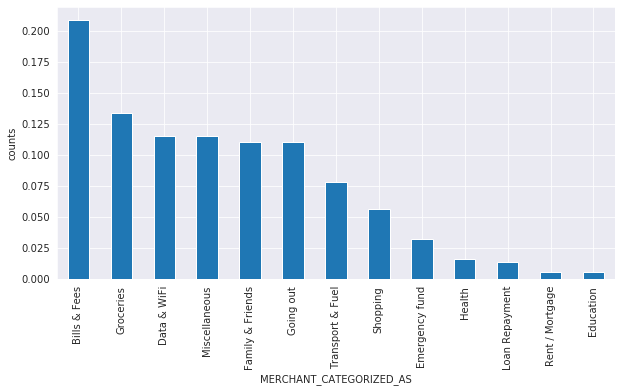

In [ ]:
print(train['MERCHANT_CATEGORIZED_AS'].value_counts())
plt.figure(figsize=(10,5))
train['MERCHANT_CATEGORIZED_AS'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MERCHANT_CATEGORIZED_AS')

#### Health - 6, Loan Repayment  -5. Rent / Mortgage - 2,Education -2
#### the above classes are highly imbalanced 

## Convcat both datasets for more FE

In [ ]:
#CONCATENATING BOTH THE TEST AND TRAIN FOR EASY DATA MANIPULATON
ntrain = train.shape[0]
ntest = test.shape[0]
data = pd.concat((train, test)).reset_index(drop=True)

### Binning

In [ ]:
def price_range(x):
    if x > 8e4:
        return 0
    elif x > 4e4:
        return 1
    elif x > 1e4:
        return 2
    return 3
data['price_range'] = data.PURCHASE_VALUE.apply(price_range)
extra['price_range'] = extra.PURCHASE_VALUE.apply(price_range)

def income_range(x):
    x /= 1e6
    # print(x)
    if x > .08:
        return 0
    elif x > .04:
        return 1
    elif x > .015:
        return 2
    return 3
data['income_range'] = data.USER_INCOME.apply(income_range)
extra['income_range'] = extra.USER_INCOME.apply(income_range)

### Feature Interaction

In [ ]:
data['prod_PURCHASE_INCOME'] = data['PURCHASE_VALUE']/ data['USER_INCOME']

#### Very powerful feature this one

### Count Encoding
* This also played a huge impact on the Model

In [ ]:
col = ['PURCHASE_VALUE','USER_INCOME','USER_HOUSEHOLD','MERCHANT_NAME']

## Count of unique features
for i in col:
    data['count_'+i] = data[i].map(data[i].value_counts())

### Manual Clustering 
* Used my domain knowledge but boy was it tiresome :) 
* Some are not so clean because they clash at some levels
* The only clusters i'm confident in are data_wifi, most of health_realted,school, most of the transport related, and shopping but there are some mixed ones in there 
* Anyways there is a better way to do this using a function plus a combination of regex which i will try later 

In [ ]:

Data_Wifi =['SAFARICOM OFFERS  TUNUKIWA','SAFARICOM HOME','SAFARICOM LIMITED','MYAIRTIME LIMITED','TELKOM KENYA LIMITED','SAFARICOM POST PAID',
           'ZUKU  FOR','ZUKU','GO TV','SAFARICOM POSTPAID','SAFARICOM POSTPAID BUNDLES','SAFARICOM POST','POA','SAFARICOM LIMITED  ON','WANGARI KINYANJUI',
            'SAFARICOM OFFERS','DEEJINA LIMITED','SAFARICOM OFFERS   TUNUKIWA ON' ,'SAFARICOM OFFERS  TUNUKIWA ON',
             'SAFARICOM SACCO DEPOSIT CONTRIBUTION',
             'SAFARICOM POSTPAID BUNDLES  BUNDLES', 'SAFARICOM TEST',
             'SAFARICOM RETAIL BURUBURU', 'SAFARICOM RETAIL GALLERIA MALL',
             'SAFARICOM WI-FI ZONE' ,'SAFARICOM RETAIL MOI AVE'
           ] 
Health_related = ['GOODLIFE PHARMACY WESTLANDS SQUARE', 'ARNICA PHARMACEUTICALS','MYDAWA  FOR','NOVACARE PHARMACY','REUBEN WEMO MEDICAL FUND  MICHEL ON',
         'ACCESS AFYA','GOODLIFE PHARMACY WESTLANDS SQUARE','ARNICA PHARMACEUTICALS','ZURI MEDICAL FUND  EVAN','NHIF',
                  'ZURI MEDICAL FUND  EVAN OMONDI','GOODLIFE PHARMACY -SARIT CENTRE 2','PHARMART CHEMIST DIANI','GOODLIFE PHARMACY-TOTAL LANGATA',
                  'HEALTHLINK MATCARE','LATEMA ROAD HEALTH CARE CHEMIST - NAIROBI','UHMC EYE CARE  UHMC','HEALTH CARE',
                  'AFRICARE CHEMIST KILIFI','MAENDELEO MEDICARE PHARMACY MONROVIA STREET NAIROBI','SAVANNAH HEALTHCARE SERVICES',
        'AVENUE HEALTHCARE LTD  JOSIAH TEYA','HEALTHY U-VAN SALE 1','HEALTH STAR PHARMACY', 'HEALTHY U',
         'SAVANNAH HEALTHCARE SERVICES', 'AVENUE HEALTHCARE LTD  JOSIAH TEYA'
         'ABUNDRO HEALTH SERVICES', 'PENDA HEALTH LIMITED KAWANGWARE','KENS PHAMARCY',
        'GOODLIFE PHARMACY WATERFRONT MALL', 'NEEM PHARMACY VALLEY ARCADE',
         'AVA PHARMACY LIMITED  AVA ON','GOODLIFE PHARMACY -WATAMU',
         'GOODLIFE PHARMACY LAVINGTON','GOODLIFE PHARMACY KILIFI',
         'MAENDELEO MEDICARE PHARMACY MONROVIA STREET NAIROBI',
         'GOODLIFE PHARMACY SARIT CENTER WESTLANDS',
         'GOODLIFE PHARMACY GARDEN CITY MALL','NEEM PHARMACY KILELESHWA BRANCH',
         'MEDIMARKET PHARMACY LIMITED','LIFEMED PHARMACY KILIMANI',
         'PORTAL PHARMACY LTD-TWO RIVERS MALL', 'DAHLIA PHARMACY LIMITED',
         'GOODLIFE PHARMACY VALLEY ARCADE','NEEM PHARMACY KILIMANI',
         'NEEM PHARMACY MSA RD','DAMCOPHARMACYLTD', 'WILLBASE PHARMACY LIMITED',
         'PESCA PHARMACY LIMITED','JAVA NAIROBI HOSPITAL',  
        'NAIROBI ADVENTIST HOSPITAL LIMITED  PATRICIA ROMANA ON',
         'THE MATER HOSPITAL - WESTLANDS CLINIC',
         'JUJA MODERN HOSPITAL LIMITED  JACKLINE NJOKI',
         'AGA KHAN HOSPITAL KILIFI CLINIC','PWANI MEDICAL CENTRE HOSPITAL ROAD',
         'PREMIER HOSPITAL LTD','HOSPITALITY FOODS PRIVATE LTD',
         'AGA KHAN UNIVERSITY HOSPITAL NBI INPATIENT BILLS  CASUALTYPZP',
         'AGA KHAN UNIVERSITY HOSPITAL NBI PEDIATRIC CASUALTY',
         'THE MATER HOSPITAL - KASARANI CLINIC',
         "JESSE KAY CHILDREN'S HOSPITAL VIA NCBA",
         'AGA KHAN UNIVERSITY HOSPITAL - RUAKA MEDICAL CENTRE','BELINDA\'S MEDICAL FUND  ANGELINDIA',
         "NAIROBI WOMEN'S HOSPITAL-ONGATA RONGAI  MAVINE SAM",                  
        'BREEZEPHARM CHEMIST KIAMBU NAIROBI' ,'PHARMA PLUS - SHELL KAREN BRANCH  KAREN ON',

         'DOVEYPHARMA CHEMIST- WESTLANDS', 'DOVEYPHARMA CHEMIST KILIMANI','KILIMANI CHILDRENS CLINIC LIMITED  SHANI NJERI',
         'AFRICARE CHEMIST KILIFI','BREEZEPHARM CHEMIST LTD',
         'ELIEZER CHEMIST VIA KOPO KOPO','ROYPHARM CHEMISTVIA COOP BANK','PHARMA PLUS - SHELL KAREN BRANCH  KAREN',
        
         'PHARMAPLUS PHARMACEUTICALS',
         'PHARMAPLUS PHARMACEUTICALS LTD - KINGARA  KING',
         'PHARMAPLUS PHARMACEUTICALS LTD CAPITAL CENTRE  CPL ON',
         'BERN  PHARMACEUTICALS' ,'AFRICA GREATNESS PHARMACEUTICALS',
         'AFRCA GREATNESS PHARMACEUTICAL CONSULTANT SPRINGVALLEY',
         'BUDGET PHARMACEUTICALS LTD', 'PHARMAPLUS PHARMACEUTICALS LTD B  LAV',
         'PHARMAPLUS PHARMACEUTICALS LIMITED KIAMBU  KIAMBU',
         'LA VIDA PHARMACEUTICALS LIMITED', 'HOPEPHARM PHARMACEUTICAL LIMITED',
         'ARNICA PHARMACEUTICALS LTD', 'OPTICA NAIROBI MEGA', 'OPTICA HOUSE','DR CECILIA',
                  
                 
                 
                 
                 
                 ]

school = ['HEART TO HEART FOUNDATION  MIKISA SCHOOL','STRATHMORE BUSINESS SCHOOL','UNIVERSITY OF NAIROBI-EXAMINATION'
 'UNIVERSITY OF NAIROBI - CHSS VIA ABSA','LIPA KARO KCB ACCOUNT','CITAM BUSINESS FORUM   CBF ON',]
Transport_related = ['RUBIS','MOTOR CONSULT SERVICES LIMITED VIA NIC BANK','SHELL RIDGEWAYS','ALPHA CAR WASH','KAPS PARKING','TOTAL K STATE HOUSE',
            'TOTAL ROSSLYN SERVICE STATION','TOTALENERGIES KITISURU','KILELESHWA SUPERSHINE','RUBIS SABAKI','ALLSTAR GAS SUPPLIES','CHANDARANA YAYA',
            'ENGEN KENYA','SHELL WINDSER','RUSHAB PETROLEUM LIMITED','TOTALENERGIES MADARAKA','OILIBYA WAIYAKI','MOGO AUTO LIMITED  KDA',
             'SAFARILINK AVIATION LIMITED','MOTOR CONSULT SERVICES LIMITED VIA NIC BANK','SHELL RIDGEWAYS','PAYTECH LIMITED','ALPHA CAR WASH',
            'MOGO AUTO LIMITED','TOTAL - KIAMBU ROAD','TOTAL SIGONA SERVICE STATION','SHELL UTHIRU TRAVELLERS STATION',
             'TOTAL ENERGIES KILELESHWA-LEMPIRAS LIMITED','FYTY CARWASH','TOTAL K STATE HOUSE','PETROCITY ENTERPRISES LIMITED',
                    'PARK N GO','TOTALENERGIES ATHI RIVER','APS ABC PARKING','TOTAL K STATE HOUSE- SHOP','SHELL ST AUSTINS SERVICES STATION',
                     'OLA ENERGY KILIMANI- TYRE PLUS LIMITED','BRIOCHE RUBIS LANGATA','TOTALENERGIES MACHAKOS','ART MARKET KILELESHWA',
                    'PALAZZO LIMITED - PARKING','RUBIS ENJOY UN AVENUE','TOTAL K STATE HOUSE 1','CHANDARANA YAYA','TOTALENERGIES MADARAKA',
                    'RUSHAB PETROLEUM LIMITED','TOTALENERGIES ATHI RIVER 1',
                     'SOTIK TOTAL', 'UTAWALA TOTAL','PARK N GO  YAYA-SP', 'PARK N GO  CIATA','FAVE GAS OIL PETROL STATION',
             'GIGIRI TOTAL',
                    'TOTALENERGIES DAGORETTI CORNER', 'TOTAL NAIVASHA','JAMBO JET  JAMBOJET','TEXAS ENERGY',
             'TOTALENERGIES KIMENDE 2', 
             'TOTALENERGIES KAREN 1','TOTAL AIRPORT','TOTAL SOUTH' 'TOTAL SOUTH C',
                     'LIBYA OIL WESTLANDS FUEL','OIL LIBYA PARKLANDS - FUSION CENTRE',
 'OILIBYA BELLEVUE', 'VEEW OIL 2','FAVE GAS OIL PETROL STATION',
             'TOTAL ARCADE', 'TOTAL SURVEY',  'TOTAL VOI',
             'TOTAL RUAKA - ATLAS PETROLEUM', 'THIKA ROAD TOTAL SERVICE STATION',
             'TOTAL KITUSURU' ,'LEMPIRAS LIMITED - TOTAL KILELESHWA',
             'TOTAL AIRPORT VIEW-ISLAND 5',
             'TOTAL SERVICE STATION CHOKAA', 'TOTALENERGIES KISERIAN 1',
             'TOTALENERGIES ONGATA RONGAI','TOTAL NEW UKUNDA SERVICE STATION',
             'TOTALENERGIES GIGIRI 1',
             'TOTAL KENYATTA AVENUE SS', 'TOTALENERGIES MAI MAHIU','THE PARKING TAVERN',
             'THIKA HIGHWAY TOTAL SERVICE STATION','TOTALENERGIES SURVEY',
             'RUBIS VALLEY','RUBIS MACHAKOS JUNCTION 2',
             'RUBIS EXPRESS DAGORETTI', 'RUBIS EXPRESS OJIJO', 'RUBIS KILIFI',
             'RUBIS EXPRESS KARATINA', 
             'KUKITO-RUBISGIGIRI', 'RUBIS PANGANI','RUBIS THIKA ROAD',
             'RUBIS RIRONI JUNCTION', 'RUBIS ENJOY BANANA', 'RUBIS EXPRESS''RUBIS VALLEY','RUBIS MACHAKOS JUNCTION 2',
             'RUBIS EXPRESS DAGORETTI', 'RUBIS EXPRESS OJIJO', 'RUBIS KILIFI',
             'RUBIS EXPRESS KARATINA', 
             'KUKITO-RUBISGIGIRI', 'RUBIS PANGANI','RUBIS THIKA ROAD',
             'RUBIS RIRONI JUNCTION', 'RUBIS ENJOY BANANA', 'RUBIS EXPRESS',
             'AUTOXPRESS','ONE WAY AUTOMOTIVE SOLUTIONS - MEBLY',
             'PRIFRASI AUTOHARDWARE', 'AUTOXPRESS NYALI', 'MOWAKA AUTO CENTER',
             'AUTO SHINE AND SPARKLE', 'NEPTUNE AUTO PARTS',
             'AUTOXPRESS GARDEN CITY MALL', 'AUTOXPRESS GIGIRI',
             'AUTOMOBILE ASSOCIATION OF KENYA','SOAPY JOES CAR WASH AND DETAIL','LIDOS CAR SHINE', 'EVOLUTION CARHIRE  TOURS',
            'SHELL KAREN SS',
              'SHELL TECO','SHELL MOI',
             'SHELL KAREN', 'SHELL NAIVASHA', 'SHELL HURLINGHAM SERVICE STATION',
             'SHELL MACHAKOS SERVICE STATION', 'SHELL SPANNERIGHT SERVICE STATION',
              'SHELL LAVINGTON GREEN SERVICE STATION',
              'ASTROL PETROLEUM COMPANY LIMITED - GRILL','RUSHAB PETROLEUM LIMITED 1'
              'SHELL BARAKA',
              'SHELL RUAI',
             'SHELL STATION SQUARE SERVICE STATION',
             'SHELL MEMBLEY SERVICE STATION SERVCO PETROLEUM LIMITED',
             'KIKUYU SHELL LTD', 'SHELL NANYUKI SERVICE STATION',
             'SHELL VOI SERVICE STATION', 'SHELL WESTVIEW SERVICE STATION',
              'SHELL BARAKA SS','SHELL THOME SERVICE STATION',
             'SHELL WILSON AIRPORT SERVICE STATION' ,'SHELL LIMURU ROAD',
             'NEW SIGONA SHELL STATION','SIGONA SHELL SHOP', 
             'SHELL KARIOKOR SERVICE STATION','INFINITE SHELL KAHAWA-FORECOURT',
             'SHELL NEW RUIRU', 'MIDAX PETROLEUM LTD - SHELL GARDEN CITY 2',
             'SHELL EASTERN BYPASS SERVICE STATION', 'SHELL ONGATA RONGAI',
             'SHELL RUAKA', 'SHELL KEROKA SERVICE STATION'
                    ]




paybills = ['THREE BINS SERVICES','EQUITY PAYBILL','KPLC PREPAID','EQUITY PAYBILL ACCOUNT','KCB PAYBILL AC','DIRECT PAY','PESAPAL  FOR','TINGG CELLULANT','ALMA APARTMENTS MANAGEMENT CO LTD',
        'KCB PAYBILL','BARISTAPRO KENYA LTD','PESAPAL','IPAY LTD','VENDIT LIMITED','NAIROBI WATER  SEWERAGE CO LTD',

             'KCB INSURANCE AGENCY LIMITED','SALESIANS OF DON BOSCO HOUSE VIA EQUITY BANK',
            'TRINITY INRENATIONAL KINDERGARTEN LTD VIA SCB  TEMI MBARI','MORINGA SCHOOL LIMITED', 'MIATHENE BOYS SECONDARY SCHOOL VIA NBK',
            
            'IPAY LTD  WEST', 'IPAY LTD  RAFU','M-PESA'
             
           
           
           
           
           
           
           
           
           ]
friends_smallbiz = ['KFATUMA OSORE','PETER KENDA','LEAH NGOGA','JACKSON ANDIVA','RAPHAEL MWANGI','TEOFILO LIGAWA','CEDRIC OCHOLA',
            'PETER NJOORA KENDA','JERUSA A OTIENO','DENIS OTIENO','TABITHA RAORE','SAMWEL KIMANI','JERUSA OTIENO','ONESMUS  GAKURU',
            'ELIZABETH NYAMBURA','JOSEPH MOGERE','MICHAEL MUSEMBI','MARIEKA WINES AND SPIRIT','CAKES BY EUDIE LIMITED','DUNCAN  NDUGO',
            'MARY MUGURE KIGO','PETER NGANGA KARUGA','GEORGE KAMAU','RISPER  KWANYA','JASON WANJOHI','ZALENA KITCHEN','',
            'HENRY NG\'ENDA','STEPHEN  OSANGO','PURTIY MWAGIRU','AGNES NGANGA','ELIVIN KWAMBOKA MOYWAYWA','HARRISON JUMA AYUAK','MUCHIRI NDAMBIRI',
            'JOSPHINE WAMBUI HOTEL','ALBERT  MBOGO','ELIZABETH WANGARI','HENRY MOGERE','ALEX  SAKWA','JULLY AKIN',
            'ESTHER WANJIKU KARANJA','JACINTA MWONGELI KALOKI VIA SMEP','DORCAS  WANJOHI','FRACIAH  KAGAI','JUDY','MICHAEL  NJERU',
             'JOEL  RABEL','DAVID MWANIKI NJOKA','GLADYS MAURINE','IVY SHIKUMU','JOHN  KIOKO','ODHIAMBO OCHIMBO','JACKLINE MWAI',
            'FREDRICK  OMENYO','STEPHANIE WANGUI','HELLEN OTIENO','WINFRIDA KHATIALA MULAMA','MICHELLE  RODROT','THOMAS GITHINJI GATHIOMI',
            'JOHN WAITHERA','PATRICK  MASESE','KELVIN NJOKA','ROGERS MORANGA','RHODA RICHARD','MARGARET  GACOMBA','RODNEY  WAITE',
             'LEE MBITHI','ELIAS MBURU','PATRICIA  ROMANA','ANASTACIA CHEROBON','JOHN ONYANGO','SHARON GESORA','BERNARD NDUNG\'U',
            'CHARLENNE AKETCH OBBO ONYANGO','FAYAZ BAKERS KILIFI TOWN SHOP','JUDY  MUSISIA','FATHALLA  ABOUBAKR','NAOMI  GATHUU',
            'STEPHEN  GITHII','JOSEPHINE THUKU','MOUREEN MOMANYI','DUKE NYAMARI','RHODA  MBITHU','JOSEPH NTHENGE','AUDRINE  MAKAKA',
            'PETER  KIHIU','FLORENCE KANANA','GHARIB HABIB','FREDRICK  NGATIA','KEN WINES AND SPIRITS','MARK  MUSISIA',
             'JUDITH MOSIGISI','BLIZZ WINES AND SPIRITS DISTRIBUTORS','DORINE ADHIAMBO','MATHEW RAPANDO','EDWIN  OMBATI','SILVANO  NGARI',
            'INNOCENT KOJWANG','SHOP LOCAL -ALMA','VALENTINE PUB WINE AND SPIRITS  V','BRAVINE SUNGAH STOWER','JULIA ODOYO','VENY  MAUTI',
            'MARY MUNGAI','CHRISTOHER ONGAYA','SEVEN EIGHT SIX BUTCHERY','JACKSON  MUSYOKI','NELLY WANJIRU KURIA','CHRISTINE MUTISYA',
             '','PETER  INDIMULI','TERESA NYARUNDA','VITAMIX FRESH FRUITS AND JUICES','KANGA HARDWARE',]

shopping = ['QUICK MART KIAMBU','CARREFOUR SRT','TUSKYS -T MALL','SHOP AND','NAIVAS LIFESTYLE','ENVY VIVA CORPORATE',
                'METROMART LTD','GITHUNGURI SELFRIDGES SUPERMARKET','NAIVAS AGA KHAN WALK','HOUSE OF CHIC','TONY WEST LIMITED',
                'JUMIA KE  VZEOAQ','NAIVAS KITENGELA','CARREFOUR','NAIVAS KAMAKIS','FARMER\'S CHOICE STOCKISTS','CARREFOUR GLR',
                'NAIROBI FAIRY NIGHT LIGHTS LIMITED  EVAN','FARMERS BUTCHERY','UCHUMI SUPERMARKET NAIROBI WEST','SERENI STORES AND MINIMATT','QUICK MART RUAKA',
                'SERENI STORES','CARREFOUR  GLR','BATA','TUSKYS -CHAP CHAP THIGIRI','BUY DIRECT LIMITED 2','NAIVAS MOI AVENUE',
                'ASL TD','SKY-GARDEN','NAIVAS','QUICK MART FRESH N EASY BYPASS','QUICK MART','NAIVAS SUPERMARKET','IDEAL APPLIANCES',
           
           'CRISTMART COLLECTIONS', 'QUICKMART NGONG-MILELE MALL','CARREFOUR TWO' ,'CARREFOUR VLM', 'CARREFOUR JCN',
             'LOWER KAREN FAMILY MART LIMITED', 'QUICK MART TOM MBOYA','CARREFOUR TWO RIVERS 5' ,'CARRERFOUR MEGA',
             'QUICK MART PIONEER NRB', 'QUICK MART LAVINGTON',
             'QUICK MART MTWAPA CHAP CHAP', 'DELMART SUPERMARKET',
              'SMARTRIX ENTERPRISES','BESTMART LIMITED',
             'TWIGA MART SUPERMARKET', 'GMART SELF SERVICE STORE', 'QUICK MART RUIRU',
             'QUEENSMART SUPERMARKET','AKAM SMARTTECH LIMITED KILIFI',
             'QUICK MART MTWAPA MALL', 
             'FLAMART SUPERMARKET' 'FLAMART SUPERMARKET-2',
              'QUICK MART LIMITED',
             'QUICK MART WAIYAKI WAY', 'TASYA MART LTD' 'QUICK MART FEDHA',
             'MAXX MART AFRICA LIMITED',
             'BROWNSTONE AGENCIES LIMITED - NAIROBI SGR MINI MART SHOP  MINI1',
             'MAMKEN MINIMART - SYOKIMAU', 'JOYMART SUPERMARKET VIA KCB',
             'COOLMART SUPERMARKET','QUICK MART MACHAKOS PIONEER',
             'JOYLAND MINIMART LTD', 'QUICK MART RONGAI' 'QUICK MART RONGAI EXPRESS','ANICARE',
               'CARREFOUR TWO' ,'CARREFOUR VLM', 'CARREFOUR JCN', 'CARREFOUR ONLINE',
             'CARREFOUR TWO RIVERS 5','CARREFOUR WGT', 'CARREFOUR TRM',
             'CARREFOUR TWO RIVERS','CARREFOUR TWO RIVERS 2','CARREFOUR TWO RIVERS 7',
             'CARREFOUR GCM','CARREFOUR NCM','CARREFOUR DIANI',
             'CARREFOUR TWO RIVERS 3', 'CARREFOUR TWO RIVERS 6', 'CARREFOUR SRT 8','CARRERFOUR MEGA 5',
             'CARREFOUR SRT 7','CARREFOUR TWO RIVERS 9',
             'TUSKYS -KILIFI','TUSKYS - EMBAKASI', 'TUSKYS DIAMOND PLAZA',
             'TUSKYS KAREN', 'TUSKYS -UNITED', 'TUSKYS -CHAPCHAP KAKAMEGA',
             'TUSKYS -IMARA', 'TUSKYS -CHIGWARE', 'TUSKYS - UTHIRU', 'TUSKYS -ONGATA',
             'TUSKYS -PIONEER', 'TUSKYS KARASHA','NAIVAS SHELL SYOKIMAU',
            'NAIVAS NGONG', 'NAIVAS WATERFRONT','NAIVAS SYOKIMAU',
             'NAIVAS WATERFRONT KAREN','NAIVAS DEVELOPMENT HOUSE',
             'NAIVAS RONALD','NAIVAS MOI', 'NAIVAS SUPERMARKET CIATA MALL OPP PARK',
             'NAIVAS NGONG GREENHOUSE','NAIVAS WEST',
             'NAIVAS DEVELOPMENT','NAIVAS SUPERMARKET KASARANI',
             'NAIVAS MOUNTAIN VIEW', 'NAIVAS KILIFI', 'NAIVAS LIKONI',
             'CHANDARANA BUFFALO MALL NAIVASHA', 'NAIVAS KAWANGAWARE',
             'NAIVAS CAPITAL CENTER', 'NAIVAS WEST END PLAZA',
             'NAIVAS LAVINGTON','NAIVAS NAIROBI CBD EPRESS', 'NAIVAS SOUTH C BRANCH','CLEANSHELF SUPERMARKETS -KIKUYU','POPULAR SUPERMARKET',
 'SUPER MARKET SKYLAR', 'FLAMART SUPERMARKET', 'SUPER DUPER COSMETICS LTD'
 'SUPER COSMETICS', 'SUPERCOSMETICS LTD', 'SPRINGSSTAR SUPERMARKET',
 'VIDEYA SUPERMARKET', 'NICE SUPERMARKET', 'GRAVITY SUPERMARKET',
             'NAIVAS THIKA ROAD',
              'NAIVAS QWETU','UCHUMI SUPERMARKET NAIROBI WEST 3','QUICK MART FEDHA', 'QUICK MART RONGAI', 'QUICK MART RONGAI EXPRESS',
            
            'CLEANSHELF SUPERMARKETS - RUAKA', 'FLAMART SUPERMARKET-2',
             'KATEX SUPERMARKETS VIA MPAYA', 'V SUPERMARKET LIMITED',
             'KARIASUPERMARKETDANDORAPH4', 'CHANDARANA SUPERMARKET LTD - ADLIFE BRANCH',
             'VIRTUAL SUPERMARKETS LIMITED', 'CLEAN SHELF SUPERMARKETS-ONGATA RONGAI',
             'CHANDARANA SUPERMARKET SIGNATURE BRANCH', 'SHIVLING SUPERMARKET HOMABAY',
             'WOTE MINI SUPERMARKET 3', 'KAMINDI SELFRIDGES SUPERMARKETS LTD',
             'KABIRIA ECOMATT SUPERMARKET1','BATA WESTGATE MALL', 'BATA HILTON' 'BATA SARIT',
               'HOUSE OF LEATHER - MBK','HOUSE OF LEATHER -WESTLANDS',
             'HOUSE OF LEATHER-ADAMS ARCADE', 'HOUSE OF LEATHER -ADAMS',
             'HOUSE OF LEATHER-HAZINA 2',
            
   'CLEAN SHELF SUPERMARKETS-KIAMBU',
 'CHANDARANA SUPERMARKET ROSSLYNE RIVIERA MALL','SWEETWORLD SUPERMARKET','OYUGIS SUPERMARKET',
           
           ]

restaurants = ['LAURELS LATTE','KUNE FOOD LAB KENYA LIMITED','HUHUS PIZZA LIMITED HO','NAIROBI JAVA','CRAFT - CHUPA CHAP',
              'THE WINNING POST LIMITED','GALITOS BELLEVUE','ANKOLE GRILL LIMITED','CBD-680','STEDMARK GARDENS  RECREATION CENTER KAREN NAIROBI',
              'PIZZA HUT YAYA','BIG FISH','JAVA AGAKHAN MAIN','THE BARNYARD LOUNGE AND GRILL','PALLET CAFE LTD','ARTCAFFE TWO RIVERS',
              'FISH BAY','KENYA MEAT PROCESSORS-DELI','SENSES ROOFTOP LOUNGE LIMITED','JAVA','ALCHEMIIST - LEGEND BAR',
              'KENGELES-GARDEN BAR','NAIROBI JAVA HOUSE SARIT CENTRE','JAVA CIATA MALL','PIZZA IN BELLEVUE','MAMBO ITALIA-LAVINGTON',
              'NIFTY TIGONI LIMITED','CAPTURE ADVENTURES','MBAIRES RESTAURANT','CAFETERIA AND TIN TIN RESTAURANT','VIBE NAIROBI LIMITED',
              'ASHAKI GRILL AND BBQ','KILIMANJARO LUNCHEONETTE','KFC WOODVALE','THE SPOT POOL BAR','OAKS  CORKS - ONLINE',
              'OWETTE DISHES','JAVA TOTAL MBAGATHI','ART CAFFE RUBIS BYPASS','PLANET YOGURT -RUBISGIGIRI','CARNIVORE TAMARIND KITCHEN 1',
               'CARNIVORE RESTAURANT- HEINEKEN GOLD','ALCHEMIST MAIN BAR','ALCHEMIST - ROOF TOP BAR', 'WINGS ALCHEMIST VIA KOPO KOPO',
               'KFC SHELL LAVIGTON DRIVE THROUGH','JAVA SHELL BARAKA','KFC SHELL BURUBURU', 'JAVA NAIVASHA','LAKE NAIVASHA HOLIDAY INN 2',
               'KCB SPORTS CLUB -RUARAKA  KCB SPORTS CLUB', 'JAVA KENYA','JAVA ROSSLYN', 'JAVA PEPONI', 'JAVA VALLEY'
                 ,'NAIROBI JAVA HOUSE NAKURU',
                 'NAIROBI JAVA HOUSE THE JUNCTION MALL', 'JAVA LAVINGTON','KFC',
                 'JAVA ROSSLYN RIVEIRA','JAVA MAMA NGINA','JAVA ORBIT',
                 'JAVA TWO RIVERS EXPRESS', 'JAVA DIANI' 'JAVA CLYDE',
                 'NAIROBI JAVA HOUSE HURLINGHAM','NAIROBI JAVA HOUSE UNIAFRIC HSE',
                 'JAVA KENYA -RE', 'JAVA ABC', 'NAIROBI JAVA HOUSE CAPITAL CENTER',
                 'JAVA AIRSIDE', 'JAVA PRESTIGE - NBI', 'NAIROBI JAVA HOUSE AGAKHAN','TEXAS BUTCHERY RESTAURANT',
                 'JAVA ASTROL','JAVA MONROVIA','NAIROBI JAVA HOUSE SOUTH C',
               'TWO RIVERS THEME PARK - RIDES  TWO RIVERS',
             'PARKLANDS SPORTS CLUB PAYBILL  N95', 'PARKLANDS SPORTS CLUB PAYBILL  N94',
             'PARKLANDS SPORTS CLUB PAYBILL  R27', 'PARKLANDS SPORTS CLUB PAYBILL','ARTCAFFE ONN',
             'PARK PLACE', 
             'CREAMY INN PARKLANDS',
             'PARADISE SAFARI PARK LIMITED', 'DESTINY PARK GARDENS KITCHEN','JIWEKE TAVERN',
               
            'RUIRU SPORTS CLUB PAY BILL  G45', 'RUIRU SPORTS CLUB PAY BILL',
             'PARKLANDS SPORTS CLUB PAYBILL  N95', 'PARKLANDS SPORTS CLUB PAYBILL  N94',
             'PARKLANDS SPORTS CLUB PAYBILL  R27', 'PARKLANDS SPORTS CLUB PAYBILL',
             'JOWAC SPORTS CLUB VIA COOP BANK',               

                 'NAIROBI JAVA HOUSE GIGIRI', 'JAVA PARKLANDS', 'JAVA VALLEY ARCADE',
               'KFC HUB','KFC KAMAKIS DINE INN', 'KFC SHELL', 'KFC - KIMATHI',
             'KFC NORTHVIEW-FRONT COUNTER','KFC- DINE IN MOMBASA RD','MOMBASA GO-KART SHANZU',
             'KFC KIMATHI DELIVERY','KFC RONGAI - DINE IN',
               
            'PIZZA IN', 'PIZZA INN LANGATA', 'PIZZA INN', 'PIZZA PIZZA UJA',
             'PIZZA INN- WESTLANDS', 'NGONG ROAD- PIZZA INN', 'HUHUS PIZZA LTD',
             'CHICAGO THE PIZZA PLACE LTD','PIZZA DELIGHT KENYA LIMITED',
             'PIZZA INN MTWAPA','PIZZA INN LINKS ROAD', 'ST AUSTIN A-PIZZA INN',
             'PIZZA INN TWO RIVERS','PIZZA INN RONGAI',
               
            "TAI'S CHICKEN GRILL AND COFFEE",'CHICKEN INN UJA','1824 WHISKEY BAR',
             'SPANNERIGHT CHICKEN INN', 'CHICKEN INN', "TAI'S CHICKEN GRILL WANGIGE",
             'CHICKEN INN KASARANI', 'CHICKEN INN DELTA SHOP', 'CHICKEN INN MTWAPA',
             'CHICKEN INN TWO RIVERS', 'CHICKEN HUT LIMITED', 'CHICKEN INN LINKS ROAD',
             'CHICKEN INN WESTLANDS', 'FISH CHICKEN BAR LTD 1',
             "TAI'S CHICKEN BUTCHERY KIKUYU",'SAN DELLA CHICKEN HOUSE',
             'CHICKEN INN RONGAI', 'CHICKEN DELIGHT', 'AMBASSADOR CHICKEN INN',   
               'THE GRACEFUL CHINESE RESTAURANT WATERFRONT',
             'PAPAREMO BEACH RESTAURANT MALINDI',
             'THE SOCIAL HOUSE RNB RESTAURANTS AND BARS','NSK SOCIAL BAR',
             'BARAZA RESTAURANT-DAGORETTI CORNER',
             'WESTGATE SHOPPING MALL  RESTAURANT ON', 'KALABASH BAR AND RESTAURANT 1',
             'MBAIRES RESTAURANT 6', 'KAREN KITCHEN RESTAURANT AND GRILL',
             'ECHOES BAR AND RESTAURANT 2', 'KAMANGO GARDENS RESTAURANT 3',
             'CRAB SHACK RESTAURANT VIA KCB', 'KAVENYA RESTAURANT LIMITED',
             'TUPELOAFRICAN RESTAURANT LTD', 'OLIVIERA RESTAURANT LTD',
             'COCO JAMBO KILIMANI RESTAURANT  COCO', 'PEPCO MATTEO RESTAURANT LIMITED',
             'RESTAURANT SUBTERRAN', 'BRIDGES ORGANIC RESTAURANT LTD NO 2',
             'YEMEN RESTAURANT LTD', 'SIGNATURE BAR AND RESTAURANT KAKAMEGA',
             'POLO RESTAURANT LIMITED 1','BAR NEXT DOOR VENTURES LTD','GRVL  GEMINI BAR ON','OASIS BAR  EDWIN','WATERHOLE SNACK BAR  MK' ,'THE SOCIAL HOUSE RNB RESTAURANTS AND BARS',
            'BARAZA RESTAURANT-DAGORETTI CORNER', 'ON THE GRIND COFFEE BAR LIMITED','THE PLACE BARRESTAURANT','SCARLET BAR AND LOUNGE', 'KALABASH BAR AND RESTAURANT 1',
            'ECHOES BAR AND RESTAURANT 2','BLACK GLIVE BAR  RESTAURANT', 'MNARANI CLUB MAIN BAR  LUCIA','JEANS BAR AND RESTAURANT',
            'INTERCHANGE BAR AND RESTAURANT','SIGNATURE BAR AND RESTAURANT KAKAMEGA','ZIPANG BAR AND LOUNGE LIMITED',
               
               
            'CLARRET LOUNGE THIGIRI','OUTVEST LOUNGE AND GRILL 3',
             'LIWAZA LOUNGE AND CAFA',"BLACKY'S LOUNGE LIMITED VIA KCB",
             'THE MORAN LOUNGE AND GRILL LTD', 'ZIPANG BAR AND LOUNGE LIMITED',
             'LA VARANDA LOUNGE VIA COOP', 'BLUE LOUNGE TG', 'MERCURY LOUNGE AND BAR',
               
               'VIEWS COFFEE HOUSE 1', 'ROADHOUSE HURLIGHAM',
             'SONY SUGAR GUESTHOUSE  LIGAWA', 'ROADHOUSE GRILL DENNIS PRITT RD'
             'K1 KLUB HOUSE 1','K1 KLUB HOUSE 3', 'RONGAI CAKE HOUSE LTD',
               
             'SERENA HOTELS', 'HERON HOTEL  HERON ON', 'TRADEMARK HOTEL -HERO BAR',
             'HOTEL RIVERVIEW', 'CHARIOT HOTELS',
             'TAMU TAMU HOTEL WOOD VALLEY GROOVE WESTLANDS',
             'NAIROBI PACIFIC HOTEL LTD',
             'KENYA COMFORT HOTEL POPATLAL MADHAVJI AND BROS LTD',
             'WELLS HOTEL LIMITED', 'GREEN PARK HOTEL TAVETA',
             'REEF HOTELS CO LTD REEF MOONSHINE  REEF', 'TAITA ROCKS HOTEL VIA KCB',
             'MADA HOTELS  KBBR', 'ASHNIL HOTELS LIMITED', 'GREEN PARK HOTEL-RECEPTION',
             'BARAKA RESCUE HOTEL VIA COOP BANK', 'BARAKA RESCUE HOTEL1',
             "GRANDPA'S HOTEL WAKIRINYAGA BUILDING JOGOO ROAD HAMZA MAKADARA",'BARAKA RESCUE HOTEL',
             'REEF HOTELS', 'CITY BLUE HOTELS LIMITED',

            'GALAXY RESORTS', 'MIALLE SEVENTY TWO RESORT LIMITED','TURTLE BAY BEACH CLUB', 'MUTHAIGA COUNTRY CLUB', 'THIKA SPORT CLUB  CLUB',
 'THIKA SPORT CLUB  SWIMMING',  'CLUB DECIMO',
             'DEROSCH LTD TA MAKUTI VILLAS RESORT Z',
             'ENKASARA RESORT LIMITED VIA CO-OP BANK',
'CK LAUNDRY LOUNGE','CASAVERA LOUNGE', 'CIERO SPORTS LOUNGE',
 'THE MINT LOUNGE', '17 LOUNGE','RED EAGLES LOUNGE',
 'MAKEL SUITES AND LOUNGE', 'JUKWAA LOUNGE', 'AZIZI LOUNGE',
 'LAVARANDA LOUNGE','SIXTY FOUR LOUNGE', 'HOMELAND LOUNGE',      
'ARTCAFFE','MADMAX KARTING', 'ART CAFFE' ,'ARTCAFFE JUNCTION',
 'ARTCAFFE YAYA', 'ARTCAFFE HUB', 'ART CAFFE LAVINGTON MALL', 'ARTCAFFE TWO',
 'ART CAFFE WESTMINSTER', 'ARTCAFFE GARDEN CITY', 'ART CAFFE WESTGATE2',
 'ART CAFFE NORTHERN BYPASS', 'ART CAFFE OVAL',
 'ARTCAFFE KILELESHWA', 
 'ARTCAFFE VALLEY ARCADE',               

              ]


loans_savings = ['XGO KENYA LIMITED','M-SHWARI ACCOUNT','ZASH LOAN','BAYES','STANBIC BANK','KANDAMOJA APP','CREDITAREA CAPITAL LIMITED','CASH NOW  CASHNOW',
                'WAKANDA CREDIT LIMITED','M-SHWARI LOCK SAVINGS','NCBA LOOP','ABSA BANK KENYA PLC','FAMILY BANK PESA PAP','K UNITY SACCO LIMITED',
                 'O-STREAM CREDIT HELA','ZIMELE UNIT TRUST','CO-OPERATIVE BANK COLLECTION ACCOUNT','IM BANK C2B','ZILLIONS CREDIT LIMITED',
                 'NCBA BANK','NCBA BANK KENYA PLC','IM BANK','BAABAX EXPRESS LIMITED','NABO CAPITAL LTD C2B','ESTIMMAS INVESTMENTS - HURLIGHAM TOTALSS 3',
                 'NCBA BANK LTD CORPORATE  KKL ON', 'EAZZYPAY EQUITY BANK ACCOUNT',
                 'NAIROBI CITY COUNTY NATIONAL BANK REVENUE ACCOUNT',
                 'BIASHARA PAYBILL VIA FAMILY BANK  TERKI',
                 'BIASHARA PAYBILL VIA FAMILY BANK  MANIA',
                 'NAIROBI CITY COUNTY NATIONAL BANK REVENUE ACCOUNT  PKN KCV','FAHARI RETIREMENT PLAN',
                 'NCBA BANK LTD CORPORATE  K3C',
                 'NAIROBI CITY COUNTY NATIONAL BANK REVENUE ACCOUNT  SUNKEN','M-KOPA KENYA LTD',
                 'CO-OPERATIVE BANK MONEY TRANSFER','MASS MARKET BANKERS','MH INVESTMENT AND DEVELOPMENT COMPANY LTD VIA CO-OP BANK',
                
                
                
                ]
miscelenous = ['MBCI   OFFERING  ON','MZIZI NETWORKS','VMX FITNESS LTD  LUCIA MUNANIE WAMBUA','KRA - NAIROBI COUNTY REVENUE','TOTAL BODY TRANSFORMATION  LUCIA MUNANIE',
              'MAMLAKA  HILL','LIBERTY LIFE','UONSDA CHURCH  TITHE-MAIN','THE NGONG ROAD FOREST ASSOCIATION1','TRASH MANAGER LIMITED',
              'SMOOTHIE DJS ENTERPRISE','THE BOSSBABY','CHAPA COPY COMPANY - KILELESHWA','CITAM KAREN   TITHE  ON','PLANTY FLOWER AND GARDEN',
              'SMART GYMS','UONSDA CHURCH  OFFERING-MAIN','KENYA REVENUE AUTHORITY','MBCI  FOR','CAPTON ENTERPRISES NRBI WEST',
               'UONSDA CHURCH  MOGERE MWAYO TITHE','KILELESHWA WARD NEIGHBORHOOD ASSOCIATION  KIWANA',
              'CITAM KITENGELA   OFFERING  ON','SMART GYMS LIMITED  VALENTINE NJOROG','MBCI  PRAYER CARAVAN','NAIROBI JAVA HOUSE KENYA MEDICAL ASSOCIATION',
              'CITAM KITENGELA   TITHE  ON','UONSDA CHURCH  TITHE- MAIN','GOOGLE PLAYSTORE  GOOGLE PLAY PURCHASE',
             'KAHAWA SUKARI SDA CHURCH  TITHE OFFERING','SDA CHURCH LAVINGTON DEVELOPMENT  FOR DEVELOPMENT','UONSDA CHURCH  MOGERE MWAYO-TITHE' ,'UONSDA CHURCH  MOGERE- MAIN TITHE',
 'UONSDA CHURCH  MAIN TITHE','KICHAKANI MEMBERS CLUB',
 'NAIROBI COSMOPOLITAN CONFERENCE LIMITED  TITHE','UONSDA CHURCH  MOGERE MWAYO-OFFERIN','UONSDA CHURCH  MAIN-OFFERING',
  'ECITIZEN  VAWQGBE ON','ECITIZEN  APZKQVL ON', 'ECITIZEN  UVPXCEN ON'
, 'ECITIZEN  ECAIKQH ON' ,'ECITIZEN  YWUKGLH ON', 'ECITIZEN  QRMYAEZ ON',
 'ECITIZEN  ITOUNYE', 'ECITIZEN  SQHTKWE', 'ZEN GARDEN' 'ECITIZEN  VWSHCPJ',
 'ECITIZEN  XWLZUQF' ,'ECITIZEN  AOUVSBF','ECITIZEN  STYIZHJ',
 'ECITIZEN  YTLVEJP' ,'ECITIZEN  KXGLZJO','ECITIZEN  NQBDEGW',
 'ECITIZEN  DCREFML' ,'ECITIZEN  CRPAYLJ','ECITIZEN  GIXDHFZ',
 'ECITIZEN  RLZFBIV' ,'ECITIZEN  FZWQNKH','ECITIZEN  VFGIWEU',
 'ECITIZEN  QNPZSME' ,'ECITIZEN  XNSPEAD','ECITIZEN  CYOSIQH',
 'ECITIZEN  SBZNJHX' ,'ECITIZEN  ZPINTEQ','ECITIZEN  ISRUJKD',
 'ECITIZEN  MGOFUCJ' ,'ECITIZEN  YNGTQAI','ECITIZEN  TXREFDY', 
               
'UONSDA CHURCH  KNH LUNCH KITTY',
 'NEWLIFE SDA CHURCH  TMI', 'UONSDA CHURCH  MAIN LUNCH KITTY',
 'UONSDA CHURCH  TUKULELUNCHMAIN',
 'FIRST CHURCH OF CHRIST SCIENTIST NAIROBI',
 'KARENGATA SDA CHURCH',
 'SEVENTH DAY ADVENTIST CHURCH NAIROBI EAST  THANKSGIVING',               
              
              ]



In [ ]:
def merchant_clusters(x):
    one=Data_Wifi
    two=Health_related
    three=Transport_related
    four =paybills
    five=friends_smallbiz
    six =shopping
    seven=restaurants
    eight=loans_savings
    nine=miscelenous
    ten = school
    
    if x in one:
        return 1
    elif x in two:
        return 2
    elif x in three:
        return 3
    elif x in four:
        return 4   
    elif x in five:
        return 5
    if x in six:
        return 6
    elif x in seven:
        return 7
    elif x in eight:
        return 8
    elif x in nine:
        return 9
    elif x in ten:
        return 10 
    
    

data['MERCHANT_NAME_bins'] = data['MERCHANT_NAME'].apply(merchant_clusters)
# extra['MERCHANT_NAME_bins'] = extra['MERCHANT_NAME'].apply(merchant_clusters)

In [ ]:
extra['MERCHANT_NAME_bins'] = extra['MERCHANT_NAME'].apply(merchant_clusters)
extra.isnull().sum()

MERCHANT_NAME            0
PURCHASE_VALUE           0
PURCHASED_AT             0
USER_GENDER              0
USER_HOUSEHOLD           0
USER_INCOME              0
USER_ID                  0
Transaction_ID           0
price_range              0
income_range             0
MERCHANT_NAME_bins    4592
dtype: int64

In [ ]:
miss = extra[extra['MERCHANT_NAME_bins'].isnull()]
miss.shape

(4592, 11)

In [ ]:
miss = miss[miss["MERCHANT_NAME"].str.contains(r'INVEST(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'SHOP(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'LT(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'COUNTY(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'INVESTMENT(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'RENT(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'HOTE(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'LIMIT(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'WINE(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'ACCOUN(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'ENTERPRIS(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'SHO(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'MAR(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'INSUR(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'STATI(?!$)') == False]
miss = miss[miss["MERCHANT_NAME"].str.contains(r'CHEM(?!$)') == False]
miss.isnull().sum()

MERCHANT_NAME            0
PURCHASE_VALUE           0
PURCHASED_AT             0
USER_GENDER              0
USER_HOUSEHOLD           0
USER_INCOME              0
USER_ID                  0
Transaction_ID           0
price_range              0
income_range             0
MERCHANT_NAME_bins    3014
dtype: int64

In [ ]:
extra = extra.dropna()
extra.shape

(5408, 11)

In [ ]:
extra = pd.concat((extra, miss)).reset_index(drop=True)
extra.shape

(8422, 11)

In [ ]:
extra.isnull().sum()

MERCHANT_NAME            0
PURCHASE_VALUE           0
PURCHASED_AT             0
USER_GENDER              0
USER_HOUSEHOLD           0
USER_INCOME              0
USER_ID                  0
Transaction_ID           0
price_range              0
income_range             0
MERCHANT_NAME_bins    3014
dtype: int64

### Filling in the resultant missing values
* filled it with cluster 5(friends_smallbiz) which is a group of peoples names


In [ ]:
for col in data.columns:

  if col in ['MERCHANT_NAME_bins']:
    data[col] = data[col].fillna(5)
    


In [ ]:
for col in extra.columns:

  if col in ['MERCHANT_NAME_bins']:
    extra[col] = extra[col].fillna(5)
    


## GroupBy Features using Extra Data
* Well at first i thought of trying it with user_id but then i thought what of the new users who are not represented so i went with merchant name instead 
* Now coming to realize, that grouping with user id makes sense all thanks to you so i will try and let you know the improvement to the CV

In [ ]:
extra.head()

,MERCHANT_NAME,PURCHASE_VALUE,PURCHASED_AT,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,price_range,income_range,MERCHANT_NAME_bins
0,ACCESS AFYA,1,2021-07-05 11:07:00+00,Male,1,10000,ID_R4T8Q46J,ID_rgne8ij5,3,3,2.0
1,POA,1500,2021-06-21 19:40:00+00,Male,1,10000,ID_R4T8Q46J,ID_4i2b28b6,3,3,1.0
2,POA,1500,2021-04-22 18:41:00+00,Male,1,10000,ID_R4T8Q46J,ID_6dvi32yc,3,3,1.0
3,ACCESS AFYA,1,2021-07-29 13:03:00+00,Male,1,10000,ID_R4T8Q46J,ID_sfk1yxbm,3,3,2.0
4,POA,1500,2021-01-22 15:45:00+00,Male,1,10000,ID_R4T8Q46J,ID_plxh7ovt,3,3,1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le_columns = ['USER_GENDER']

for col in le_columns:
   extra[col] = le.fit_transform(extra[col])

In [ ]:
merch_bins_groups = extra.groupby('MERCHANT_NAME_bins').agg(


             bins_purchase_merch_min = ("PURCHASE_VALUE", "min"),
             bins_purchase_merch_max = ("PURCHASE_VALUE", "max"),        
             bins_purchase_merch_sum = ("PURCHASE_VALUE", "sum"),
             bins_purchase_merch_mean = ("PURCHASE_VALUE", "mean"),
             bins_purchase_merch_count = ("PURCHASE_VALUE", "count"),
    
             bins_income_min = ("USER_INCOME", "min"),
             bins_income_max = ("USER_INCOME", "max"),        
             bins_income_sum = ("USER_INCOME", "sum"),
             bins_income_mean = ("USER_INCOME", "mean"),
    
                   

                
             
             ).reset_index()

In [ ]:
# check unique values in dataset
merch_bins_groups.apply(lambda x: len(x.unique()))

MERCHANT_NAME_bins           10
bins_purchase_merch_min       8
bins_purchase_merch_max       8
bins_purchase_merch_sum      10
bins_purchase_merch_mean     10
bins_purchase_merch_count    10
bins_income_min               2
bins_income_max               2
bins_income_sum              10
bins_income_mean             10
dtype: int64

In [ ]:
# extra_groups.head(5)

In [ ]:
# extra_groups.columns

In [ ]:
data = pd.merge(data,merch_bins_groups,on=['MERCHANT_NAME_bins'],how ='left')
data.shape

(931, 28)

### Merchant_Name groups

In [ ]:
merch_groups = extra.groupby('MERCHANT_NAME').agg(


             purchase_merch_min = ("PURCHASE_VALUE", "min"),
             purchase_merch_max = ("PURCHASE_VALUE", "max"),        
             purchase_merch_sum = ("PURCHASE_VALUE", "sum"),
             purchase_merch_mean = ("PURCHASE_VALUE", "mean"),
             purchase_merch_count = ("PURCHASE_VALUE", "count"),
    
             income_min = ("USER_INCOME", "min"),
             income_max = ("USER_INCOME", "max"),        
             income_sum = ("USER_INCOME", "sum"),
             income_mean = ("USER_INCOME", "mean"),
    
                   

                
             
             ).reset_index()

In [ ]:
merch_groups.head()

,MERCHANT_NAME,purchase_merch_min,purchase_merch_max,purchase_merch_sum,purchase_merch_mean,purchase_merch_count,income_min,income_max,income_sum,income_mean
0,17 LOUNGE,1000,1090,2090,1045.0,2,350000,350000,700000,350000.0
1,1824 WHISKEY BAR,250,1350,3000,750.0,4,10000,10000,40000,10000.0
2,254 BREWING COMPANY-TAP ROOM,1625,1625,1625,1625.0,1,252000,252000,252000,252000.0
3,2NK SACCO MAIN,600,600,600,600.0,1,350000,350000,350000,350000.0
4,2NK SACCO MAIN 1,300,300,300,300.0,1,10000,10000,10000,10000.0


In [ ]:
# check unique values in dataset
merch_groups.apply(lambda x: len(x.unique()))

MERCHANT_NAME           2124
purchase_merch_min       500
purchase_merch_max       619
purchase_merch_sum       800
purchase_merch_mean      887
purchase_merch_count      53
income_min                15
income_max                15
income_sum               292
income_mean              228
dtype: int64

In [ ]:
data = pd.merge(data,merch_groups,on=['MERCHANT_NAME'],how ='left')
data.shape

(931, 37)

In [ ]:
# cat_columns = [col for col in extra.select_dtypes('object').columns]

num_columns = [col for col in data.select_dtypes(['int', 'float']).columns if col not in ['MERCHANT_CATEGORIZED_AS',]]
num_columns

['PURCHASE_VALUE',
 'USER_HOUSEHOLD',
 'USER_INCOME',
 'price_range',
 'income_range',
 'prod_PURCHASE_INCOME',
 'count_PURCHASE_VALUE',
 'count_USER_INCOME',
 'count_USER_HOUSEHOLD',
 'count_MERCHANT_NAME',
 'MERCHANT_NAME_bins',
 'bins_purchase_merch_min',
 'bins_purchase_merch_max',
 'bins_purchase_merch_sum',
 'bins_purchase_merch_mean',
 'bins_purchase_merch_count',
 'bins_income_min',
 'bins_income_max',
 'bins_income_sum',
 'bins_income_mean',
 'purchase_merch_min',
 'purchase_merch_max',
 'purchase_merch_sum',
 'purchase_merch_mean',
 'purchase_merch_count',
 'income_min',
 'income_max',
 'income_sum',
 'income_mean']

In [ ]:
cat_columns = [col for col in extra.select_dtypes('object').columns]
cat_columns

['MERCHANT_NAME', 'PURCHASED_AT', 'USER_ID', 'Transaction_ID']

#### Fill the resultant missing values with Zeros
* Zeros gave me the best result but -9999 gave almost the same cv score

In [ ]:
data.isnull().sum()

MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
MERCHANT_CATEGORIZED_AS                  558
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_GENDER                                0
USER_HOUSEHOLD                             0
USER_INCOME                                0
USER_ID                                    0
Transaction_ID                             0
price_range                                0
income_range                               0
prod_PURCHASE_INCOME                       0
count_PURCHASE_VALUE                       0
count_USER_INCOME                          0
count_USER_HOUSEHOLD                       0
count_MERCHANT_NAME                        0
MERCHANT_NAME_bins                         0
bins_purchase_merch_min                    0
bins_purchase_merch_max                    0
bins_purchase_merch_sum                    0
bins_purch

In [ ]:
for col in data.columns:
    if col in num_columns:
        data[col] = data[col].fillna(0)

data.isnull().sum()

MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
MERCHANT_CATEGORIZED_AS                  558
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_GENDER                                0
USER_HOUSEHOLD                             0
USER_INCOME                                0
USER_ID                                    0
Transaction_ID                             0
price_range                                0
income_range                               0
prod_PURCHASE_INCOME                       0
count_PURCHASE_VALUE                       0
count_USER_INCOME                          0
count_USER_HOUSEHOLD                       0
count_MERCHANT_NAME                        0
MERCHANT_NAME_bins                         0
bins_purchase_merch_min                    0
bins_purchase_merch_max                    0
bins_purchase_merch_sum                    0
bins_purch

## Pandas Get Dummies

In [ ]:
data = pd.get_dummies(data, columns = [
'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY','USER_GENDER',

])
data.head(3)

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,price_range,...,purchase_merch_mean,purchase_merch_count,income_min,income_max,income_sum,income_mean,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY_False,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY_True,USER_GENDER_Female,USER_GENDER_Male
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,3,10000,ID_ZX4DCF4K,ID_04mk78fa,3,...,888.571429,7.0,10000.0,10000.0,70000.0,10000.000000,1,0,0,1
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,4,90000,ID_U9WZMGJZ,ID_04xkfb07,3,...,0.000000,0.0,0.0,0.0,0.0,0.000000,1,0,1,0
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,3,10000,ID_ZX4DCF4K,ID_051urwuw,3,...,41.930365,876.0,8000.0,350000.0,49761000.0,56804.794521,1,0,0,1


##  Label Encoding

In [ ]:
cat_columns = ['MERCHANT_CATEGORIZED_AS',  'USER_ID', 'Transaction_ID',
       'MERCHANT_NAME'
]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le_columns = [col for col in cat_columns if col not in ['MERCHANT_CATEGORIZED_AS','Transaction_ID']]

for col in le_columns:
   data[col] = le.fit_transform(data[col])

In [ ]:
data.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,price_range,...,purchase_merch_mean,purchase_merch_count,income_min,income_max,income_sum,income_mean,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY_False,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY_True,USER_GENDER_Female,USER_GENDER_Male
0,2022-05-04 10:25:50.588042+00,413,Rent / Mortgage,1700,2022-05-04 13:56:00+00,3,10000,29,ID_04mk78fa,3,...,888.571429,7.0,10000.0,10000.0,70000.0,10000.000000,1,0,0,1
1,2021-10-25 16:18:38.586837+00,299,Transport & Fuel,100,2021-10-24 14:12:00+00,4,90000,25,ID_04xkfb07,3,...,0.000000,0.0,0.0,0.0,0.0,0.000000,1,0,1,0
2,2022-05-20 14:17:30.917297+00,348,Data & WiFi,20,2022-05-27 12:46:00+00,3,10000,29,ID_051urwuw,3,...,41.930365,876.0,8000.0,350000.0,49761000.0,56804.794521,1,0,0,1
3,2022-04-12 15:59:14.139347+00,434,Loan Repayment,3800,2022-02-07 12:16:00+00,5,252000,3,ID_0e1om7rz,3,...,0.000000,0.0,0.0,0.0,0.0,0.000000,1,0,0,1
4,2022-05-04 10:24:26.709045+00,244,Bills & Fees,60,2022-05-04 15:28:00+00,3,10000,29,ID_0kfcoawb,3,...,60.000000,10.0,10000.0,30000.0,140000.0,14000.000000,1,0,0,1


## Continous Features
* The only continous feature we had was purchase_value


###  Add statistical Information on the Numerical Columns
* did not work because the numerical columns behaved as levels of some sort so left it out

In [ ]:
# num_cols = ['PURCHASE_VALUE']

In [ ]:
# def add_stats(data, feats):
    
#     before_ = data.shape[1]
#     cols = feats
#     data['f_min']   = data[cols].fillna(0).min(axis = 1)
#     data['f_max']   = data[cols].fillna(0).max(axis = 1)
#     data['f_mean']  = data[cols].fillna(0).mean(axis = 1)
#     data['f_sd']    = data[cols].fillna(0).std(axis = 1)
#     data['f_median']= data[cols].fillna(0).median(axis = 1)
#     data['f_sum']   = data[cols].fillna(0).sum(axis = 1)
#     data['f_skew']  = data[cols].fillna(0).skew(axis=1)

#     after_ = data.shape[1]
#     new_cols = data.iloc[:,before_:after_].columns.tolist()
    
#     return data, new_cols

In [ ]:
# data, stat_cols = add_stats(data, [col for col in num_cols])

In [ ]:
# data.head()

In [ ]:
data.isnull().sum()

MERCHANT_CATEGORIZED_AT                          0
MERCHANT_NAME                                    0
MERCHANT_CATEGORIZED_AS                        558
PURCHASE_VALUE                                   0
PURCHASED_AT                                     0
USER_HOUSEHOLD                                   0
USER_INCOME                                      0
USER_ID                                          0
Transaction_ID                                   0
price_range                                      0
income_range                                     0
prod_PURCHASE_INCOME                             0
count_PURCHASE_VALUE                             0
count_USER_INCOME                                0
count_USER_HOUSEHOLD                             0
count_MERCHANT_NAME                              0
MERCHANT_NAME_bins                               0
bins_purchase_merch_min                          0
bins_purchase_merch_max                          0
bins_purchase_merch_sum        

## Generate Date Features and count encode some of them
* Here count encoding of some helped as seen in the model later
* Those which didnt i dropped them

In [ ]:
def basic_features(data, col):

    data[col+'year'] = data[col].dt.year
    data[col+'year'] = data[col+'year']-min(data[col+'year'])
    data[col+'month'] = data[col].dt.month
    data[col+'dayofweek'] = data[col].dt.dayofweek
    

    return data

def ddiff_features(data, col1, col2):
    
    data[col1] = pd.to_datetime(data[col1])
    data[col2] = pd.to_datetime(data[col2])
    data['MD_'+col1+col2] = ((data[col1] - data[col2])/np.timedelta64(1, 'M')).astype(int, errors='ignore')
    data['YD_'+col1+col2] = ((data[col1] - data[col2])/np.timedelta64(1, 'Y')).astype(int, errors='ignore')
    data['DD_'+col1+col2] = ((data[col1] - data[col2])/np.timedelta64(1, 'D')).astype(int, errors='ignore')
    
    return data


In [ ]:
data['PURCHASED_AT'] = pd.to_datetime(data['PURCHASED_AT'])
data['MERCHANT_CATEGORIZED_AT'] = pd.to_datetime(data['MERCHANT_CATEGORIZED_AT'])

In [ ]:
data = basic_features(data, 'PURCHASED_AT')
data = basic_features(data,'MERCHANT_CATEGORIZED_AT')

In [ ]:
data = ddiff_features(data, 'PURCHASED_AT','MERCHANT_CATEGORIZED_AT')

In [ ]:
data = data.drop(columns = ['PURCHASED_AT','MERCHANT_CATEGORIZED_AT'])
data.shape

(931, 46)

In [ ]:
# data['month_day'] = data['PURCHASED_ATmonth'].astype(str) + '_' + data['PURCHASED_ATday'].astype(str)
# data['month_wkday'] = data['PURCHASED_ATmonth'].astype(str) + '_' + data['PURCHASED_ATdayofweek'].astype(str)

In [ ]:
data.head()

,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,price_range,income_range,prod_PURCHASE_INCOME,...,USER_GENDER_Male,PURCHASED_ATyear,PURCHASED_ATmonth,PURCHASED_ATdayofweek,MERCHANT_CATEGORIZED_ATyear,MERCHANT_CATEGORIZED_ATmonth,MERCHANT_CATEGORIZED_ATdayofweek,MD_PURCHASED_ATMERCHANT_CATEGORIZED_AT,YD_PURCHASED_ATMERCHANT_CATEGORIZED_AT,DD_PURCHASED_ATMERCHANT_CATEGORIZED_AT
0,413,Rent / Mortgage,1700,3,10000,29,ID_04mk78fa,3,3,0.170000,...,1,4,5,2,1,5,2,0,0,0
1,299,Transport & Fuel,100,4,90000,25,ID_04xkfb07,3,0,0.001111,...,0,3,10,6,0,10,0,0,0,-1
2,348,Data & WiFi,20,3,10000,29,ID_051urwuw,3,3,0.002000,...,1,4,5,4,1,5,4,0,0,6
3,434,Loan Repayment,3800,5,252000,3,ID_0e1om7rz,3,0,0.015079,...,1,4,2,0,1,4,1,-2,0,-64
4,244,Bills & Fees,60,3,10000,29,ID_0kfcoawb,3,3,0.006000,...,1,4,5,2,1,5,2,0,0,0


In [ ]:
col = ['DD_PURCHASED_ATMERCHANT_CATEGORIZED_AT']

## Count of unique features
for i in col:
    data['count_'+i] = data[i].map(data[i].value_counts())

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# le_columns = ['month_day','month_wkday']

# for col in le_columns:
#    data[col] = le.fit_transform(data[col])

In [ ]:
data.head()

,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,price_range,income_range,prod_PURCHASE_INCOME,...,PURCHASED_ATyear,PURCHASED_ATmonth,PURCHASED_ATdayofweek,MERCHANT_CATEGORIZED_ATyear,MERCHANT_CATEGORIZED_ATmonth,MERCHANT_CATEGORIZED_ATdayofweek,MD_PURCHASED_ATMERCHANT_CATEGORIZED_AT,YD_PURCHASED_ATMERCHANT_CATEGORIZED_AT,DD_PURCHASED_ATMERCHANT_CATEGORIZED_AT,count_DD_PURCHASED_ATMERCHANT_CATEGORIZED_AT
0,413,Rent / Mortgage,1700,3,10000,29,ID_04mk78fa,3,3,0.170000,...,4,5,2,1,5,2,0,0,0,72
1,299,Transport & Fuel,100,4,90000,25,ID_04xkfb07,3,0,0.001111,...,3,10,6,0,10,0,0,0,-1,18
2,348,Data & WiFi,20,3,10000,29,ID_051urwuw,3,3,0.002000,...,4,5,4,1,5,4,0,0,6,18
3,434,Loan Repayment,3800,5,252000,3,ID_0e1om7rz,3,0,0.015079,...,4,2,0,1,4,1,-2,0,-64,4
4,244,Bills & Fees,60,3,10000,29,ID_0kfcoawb,3,3,0.006000,...,4,5,2,1,5,2,0,0,0,72


## Separate the combined dataset

In [ ]:
# Separate train and test data from the combined dataframe
train_df = data[:ntrain]
test_df = data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((373, 47), (558, 47))

### Label Encode the Target

In [ ]:
train['MERCHANT_CATEGORIZED_AS'].value_counts()

Bills & Fees        78
Groceries           50
Data & WiFi         43
Miscellaneous       43
Family & Friends    41
Going out           41
Transport & Fuel    29
Shopping            21
Emergency fund      12
Health               6
Loan Repayment       5
Rent / Mortgage      2
Education            2
Name: MERCHANT_CATEGORIZED_AS, dtype: int64

In [ ]:
for col in ['MERCHANT_CATEGORIZED_AS']:
   train_df[col] = le.fit_transform(train_df[col])

## KMEANS Clustering
* Decided to use MERCHANT_NAME because thats our gold feature and purchase value
* Later decided onky on merchant_name which was the only one that led to an improvement

In [ ]:

clust = ['MERCHANT_NAME']
train = train_df.copy()

#### The function below just shows us what is the best number of clusters to use 

MERCHANT_NAME 49142.47040920552


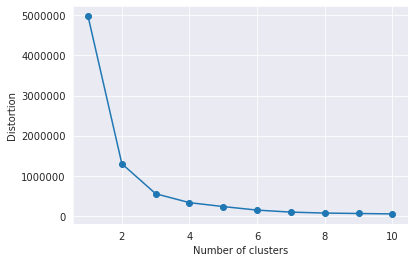

In [ ]:
from sklearn.cluster import KMeans
for j in clust:
    distortions = []
    if train[j].dtype == object: # One-Hot encode data if it is categorical
        dummies = pd.get_dummies(train[j], drop_first=True)
        for i in range(1, 11):
            km = KMeans(
                n_clusters=i, init='k-means++',
                n_init=20, max_iter=300,
                tol=1e-04, random_state=0
            )
            km.fit(dummies)
            distortions.append(km.inertia_)

        # plot
        print(j, km.inertia_)
        plt.plot(range(1, 11), distortions, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Distortion')
        plt.show()
    
    else:
        for i in range(1, 11):
            km = KMeans(
                n_clusters=i, init='k-means++',
                n_init=20, max_iter=300,
                tol=1e-04, random_state=0
            )
            km.fit(pd.DataFrame(train[j]))
            distortions.append(km.inertia_)

        # plot

        print(j, km.inertia_)
        plt.plot(range(1, 11), distortions, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Distortion')
        plt.show()



#### Six gave the best score on the CV

In [ ]:
kmeans = KMeans(
        n_clusters=6, init='k-means++',
        n_init=20, max_iter=300,
        tol=1e-04, random_state=0
    )

In [ ]:
test = test_df.copy()

In [ ]:
%%capture 
#To avoid clumsy cell output

for col in clust:
    if train[col].dtype == object:
        dummies = pd.get_dummies(train[col], drop_first=True)
        test_dum = pd.get_dummies(test[col], drop_first=True)
        kmeans.fit(dummies)
        train[col+'_grouped'] = kmeans.labels_
        test[col+'_grouped'] = kmeans.predict(test_dum)
    else:
        kmeans.fit(pd.DataFrame(train[col]))
        train[col+'_grouped'] = kmeans.labels_
        test[col+'_grouped'] = kmeans.predict(pd.DataFrame(test[col]))


In [ ]:
train.shape, test.shape

((373, 48), (558, 48))

In [ ]:
train.head()

,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,price_range,income_range,prod_PURCHASE_INCOME,...,PURCHASED_ATmonth,PURCHASED_ATdayofweek,MERCHANT_CATEGORIZED_ATyear,MERCHANT_CATEGORIZED_ATmonth,MERCHANT_CATEGORIZED_ATdayofweek,MD_PURCHASED_ATMERCHANT_CATEGORIZED_AT,YD_PURCHASED_ATMERCHANT_CATEGORIZED_AT,DD_PURCHASED_ATMERCHANT_CATEGORIZED_AT,count_DD_PURCHASED_ATMERCHANT_CATEGORIZED_AT,MERCHANT_NAME_grouped
0,413,10,1700,3,10000,29,ID_04mk78fa,3,3,0.170000,...,5,2,1,5,2,0,0,0,72,3
1,299,12,100,4,90000,25,ID_04xkfb07,3,0,0.001111,...,10,6,0,10,0,0,0,-1,18,5
2,348,1,20,3,10000,29,ID_051urwuw,3,3,0.002000,...,5,4,1,5,4,0,0,6,18,1
3,434,8,3800,5,252000,3,ID_0e1om7rz,3,0,0.015079,...,2,0,1,4,1,-2,0,-64,4,3
4,244,0,60,3,10000,29,ID_0kfcoawb,3,3,0.006000,...,5,2,1,5,2,0,0,0,72,5


## Correlation

### 1. Negative correlation with the target

In [ ]:
train.corr()['MERCHANT_CATEGORIZED_AS'].sort_values()[train.corr()['MERCHANT_CATEGORIZED_AS'].sort_values() < 0]

count_MERCHANT_NAME                            -0.296200
income_sum                                     -0.272344
purchase_merch_count                           -0.264912
USER_ID                                        -0.229815
bins_purchase_merch_max                        -0.217279
purchase_merch_sum                             -0.201388
count_DD_PURCHASED_ATMERCHANT_CATEGORIZED_AT   -0.199362
purchase_merch_max                             -0.186184
income_range                                   -0.161370
MERCHANT_CATEGORIZED_ATyear                    -0.103929
PURCHASED_ATyear                               -0.090130
prod_PURCHASE_INCOME                           -0.089648
count_USER_INCOME                              -0.087789
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY_True     -0.086870
PURCHASE_VALUE                                 -0.074565
USER_GENDER_Male                               -0.073213
count_USER_HOUSEHOLD                           -0.070416
bins_purchase_merch_mean       

### 2. Positive correlation with the Target

In [ ]:
train.corr()['MERCHANT_CATEGORIZED_AS'].sort_values()[train.corr()['MERCHANT_CATEGORIZED_AS'].sort_values() >0]

purchase_merch_mean                            0.001101
bins_income_sum                                0.008894
DD_PURCHASED_ATMERCHANT_CATEGORIZED_AT         0.024230
MD_PURCHASED_ATMERCHANT_CATEGORIZED_AT         0.030059
PURCHASED_ATdayofweek                          0.030761
bins_purchase_merch_sum                        0.041652
USER_INCOME                                    0.041954
YD_PURCHASED_ATMERCHANT_CATEGORIZED_AT         0.045564
income_mean                                    0.049303
bins_income_max                                0.053735
purchase_merch_min                             0.054469
MERCHANT_CATEGORIZED_ATmonth                   0.057745
price_range                                    0.066434
MERCHANT_NAME                                  0.067395
USER_GENDER_Female                             0.073213
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY_False    0.086870
MERCHANT_NAME_bins                             0.120163
bins_income_mean                               0

## Save the new datasets

In [ ]:
# train_df.to_csv('train_noagegroups.csv',index=False)
# test_df.to_csv('test_noagegroups.csv',index=False)
train.to_csv('alvintrain_base.csv',index=False)
test.to_csv('alvintest_base.csv',index=False)